# $\S$ 2.1: Meteoroid stream mass (Hughes & McBride 1989)

In [1]:
import numpy as np, pint
ureg = pint.UnitRegistry()

Constants and semi-constants

In [2]:
f = 10
ve = 29700 * ureg.m / ureg.s
sin_epsilon = 1
vhvg = 1

Figure out $I$, the mass influx, from number flux. We will use the radar meteoroid background flux, $10^{-3}~\mathrm{km^{-2} hr^{-1}}$, for meteoroid mass of $10^{-7}$ kg.

In [3]:
flux = 1e-3 / ureg.km**2 / ureg.hour
metmass = 1e-7 * ureg.kg

flux = flux.to(1 / ureg.m**2 / ureg.s)
bigi = metmass * flux

In [4]:
bigi

<Quantity(2.7777777777777776e-20, 'kilogram / meter ** 2 / second')>

Define shower duration and orbital period

In [5]:
t = 5 * ureg.day
p = 5 * ureg.year

t = t.to(ureg.second)
p = p.to(ureg.second)

In [6]:
(f * np.pi * t**2 * ve**2 * bigi * sin_epsilon**2 * vhvg * p / 4).to_compact()

<Quantity(5.666729318417731, 'teragram')>

# $\S$ 2.3: Synthetic asteroids from Granvik et al.'s model

In [7]:
import pandas as pd, numpy as np

/home/qye/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/qye/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
%matplotlib inline 

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

## Particles (synthetic asteroids) for simulation, and formation/dispersion/visible timescale of the stream, using Whipple and gravitational escape ejection model

In [9]:
d = pd.read_csv('../data/granvik.dat', delim_whitespace=True, names=['description', 'a (AU)', 'e', 'i (deg)', \
                                                    'node (deg)', 'peri (deg)', 'MA (deg)', 'q (AU)', 'Q (AU)', \
                                                      'formation-Whipple (yr)', 'dispersion-Whipple (yr)', 'visible-Whipple (yr)', \
                                                      'formation-grav (yr)', 'dispersion-grav (yr)', 'visible-grav (yr)'])

pd.DataFrame(d)

,description,a (AU),e,i (deg),node (deg),peri (deg),MA (deg),q (AU),Q (AU),formation-Whipple (yr),dispersion-Whipple (yr),visible-Whipple (yr),formation-grav (yr),dispersion-grav (yr),visible-grav (yr)
0,particle_11:5/particle_11:5.out:DISRUPTION,3.3570,0.99197,26.0859,69.0959,199.8899,139.9422,0.0270,6.6870,5.0,79.0,NaN,7.0,122.0,NaN
1,particle_2:1/particle_2:1.out:DISRUPTION,2.9648,0.98498,15.7065,320.4479,62.1393,33.5693,0.0445,5.8850,6.0,296.0,53.0,8.0,284.0,36.0
2,particle_2:1/particle_2:1.out:DISRUPTION,3.3130,0.98393,14.3256,89.3920,181.2176,253.3907,0.0532,6.5727,8.0,74.0,NaN,9.0,50.0,NaN
3,particle_2:1/particle_2:1.out:DISRUPTION,3.3299,0.98649,24.3830,260.6000,31.8462,124.0304,0.0450,6.6147,6.0,371.0,NaN,9.0,371.0,NaN
4,particle_2:1/particle_2:1.out:DISRUPTION,2.9036,0.99428,34.1436,276.7547,177.6909,95.6629,0.0166,5.7905,NaN,NaN,NaN,NaN,NaN,NaN
5,particle_2:1/particle_2:1.out:DISRUPTION,3.2728,0.98573,19.4239,100.5489,289.4010,335.0609,0.0467,6.4990,6.0,761.0,133.0,10.0,1253.0,68.0
6,particle_2:1/particle_2:1.out:DISRUPTION,3.1029,0.98300,20.3282,182.7812,272.9424,318.2411,0.0527,6.1530,8.0,1614.0,88.0,9.0,1695.0,73.0
7,particle_2:1/particle_2:1.out:DISRUPTION,3.3008,0.99007,23.8916,299.9122,57.7673,247.2735,0.0328,6.5688,5.0,195.0,NaN,7.0,289.0,NaN
8,particle_2:1/particle_2:1.out:DISRUPTION,2.8868,0.98418,20.0250,227.8088,26.2739,253.7149,0.0457,5.7279,6.0,132.0,NaN,8.0,132.0,NaN
9,particle_2:1/particle_2:1.out:DISRUPTION,3.2912,0.98500,15.6097,160.4680,98.9585,252.5457,0.0494,6.5330,7.0,1049.0,91.0,9.0,1073.0,73.0


## Fig. 1: orbital distribution of the particles

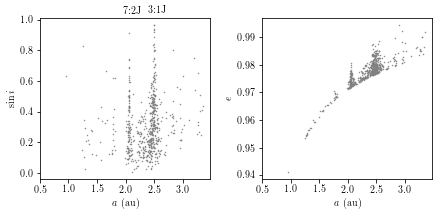

In [10]:
f, ax = plt.subplots(1, 2, figsize=(6.25, 3))

ax[0].plot(d['a (AU)'], np.sin(np.deg2rad(d['i (deg)'])), '.', markersize=1, color='gray')
ax[0].set_xlabel(r'$a$ (au)')
ax[0].set_ylabel(r'$\sin{i}$')
ax[0].text(2.4, 1.04, '3:1J')
ax[0].text(1.95, 1.04, '7:2J')
ax[0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[1].plot(d['a (AU)'], d['e'], '.', markersize=1, color='gray')
ax[1].set_xlabel(r'$a$ (au)')
ax[1].set_ylabel(r'$e$')
ax[1].set_xticks(np.arange(0.5, 3.5, step=0.5))

f.tight_layout()
plt.savefig('neo-model.pdf')
plt.show()

## Fig. 2: animation of the evolution of a stream

In [11]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import matplotlib
from scipy.stats import gaussian_kde

dust = np.loadtxt('../data/granvik_sim/S058b22_met-pos_2451545.0_2451910.5_6103680.0_0.0005_0.05_1._-3.6_179.9.int.dat.gz', \
                  usecols=(0,2,3)).T

[MoviePy] >>>> Building video stream-sim.mp4
[MoviePy] Writing video stream-sim.mp4


100%|█████████▉| 9997/9998 [11:11<00:00, 14.88it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: stream-sim.mp4 



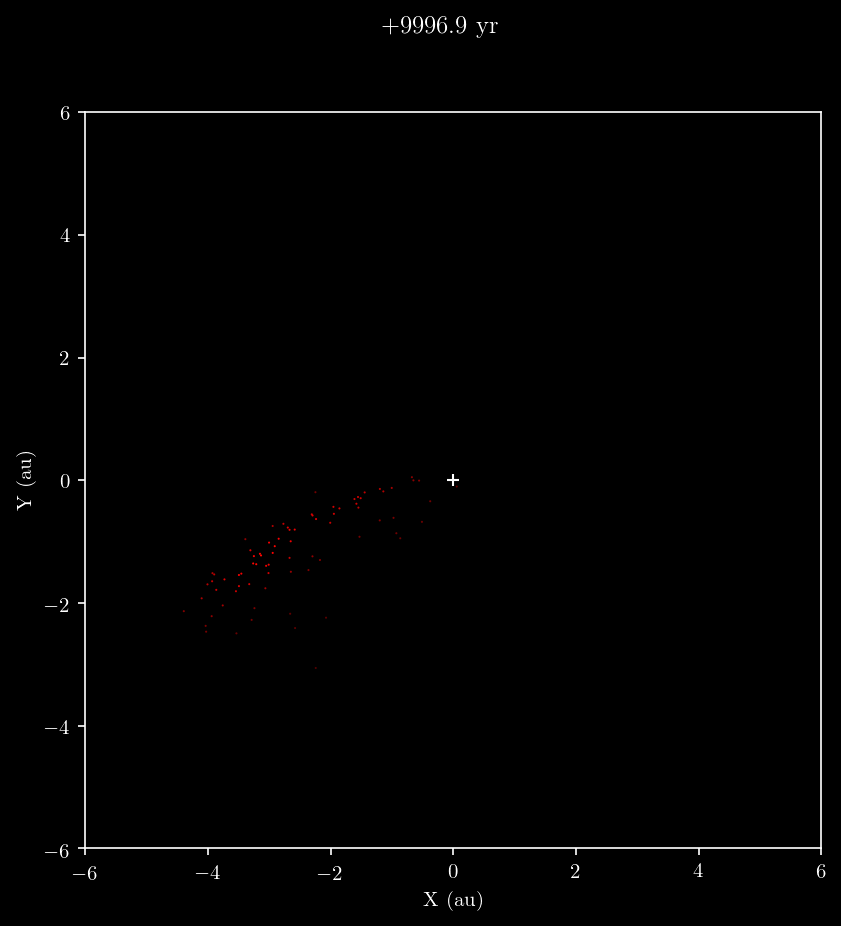

In [12]:
epoch = np.unique(dust[0])
    
f = plt.figure(figsize=(6.5, 6.5), dpi=150)
plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'})
f.patch.set_facecolor('black')
ax = f.add_subplot(111, aspect=1)
ax.set_autoscale_on(False)

duration = 120   # in s
fps = (len(epoch)-1)/duration

def make_frame(t):
    i = int(np.floor(t*fps))
    ax.clear()
    ax.set_facecolor('k')
    
    ax.plot(0, 0, '+', color='w')
    
    xy = np.vstack([dust[1][np.where(dust[0] == epoch[i])], dust[2][np.where(dust[0] == epoch[i])]])
    z = gaussian_kde(xy)(xy)
    ax.scatter(dust[1][np.where(dust[0] == epoch[i])], dust[2][np.where(dust[0] == epoch[i])], c=z, s=1, \
               edgecolor='', cmap='hot', vmin=-0.1, vmax=1)  
    
    tt = (epoch[i] - 2451545)/365.25
    plt.suptitle('+%.1f yr' % float(tt), color='w')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_xlabel('X (au)', color='w')
    ax.set_ylabel('Y (au)', color='w')

    return mplfig_to_npimage(f)

animation = VideoClip(make_frame, duration=duration)
#animation.ipython_display(fps=fps, loop=True, autoplay=True)
animation.write_videofile('stream-sim.mp4', fps=fps)

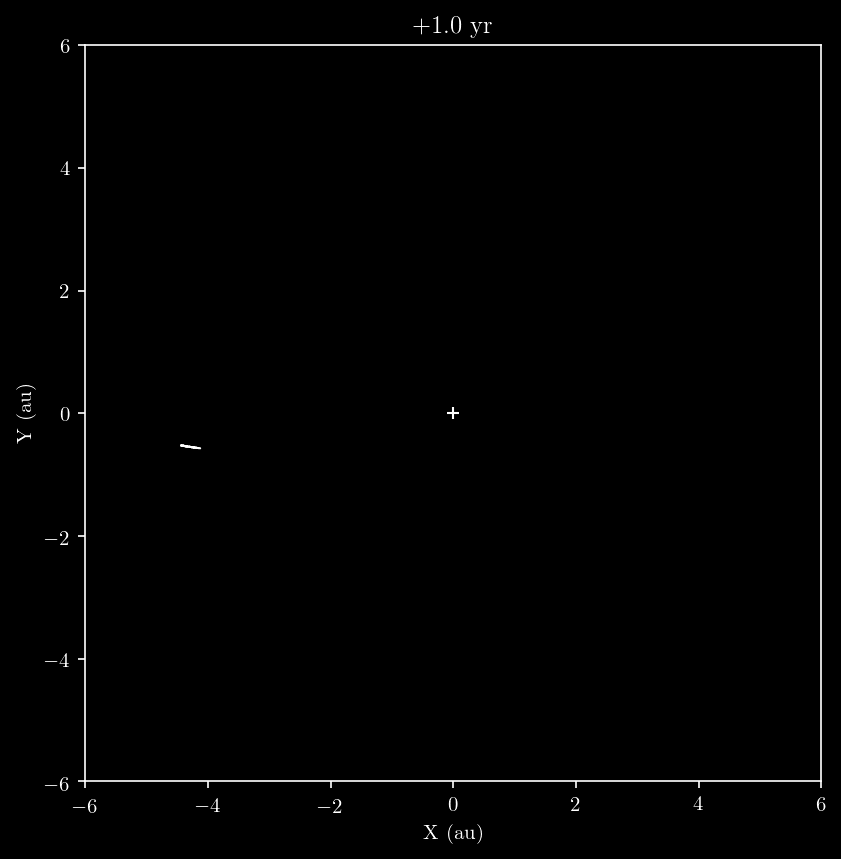

In [13]:
f = plt.figure(figsize=(6.5, 6.5), dpi=150)
f.patch.set_facecolor('black')
ax = f.add_subplot(111, aspect=1)
ax.set_autoscale_on(False)

ax.set_facecolor('k')
    
ax.plot(0, 0, '+', color='w')
    
xy = np.vstack([dust[1][np.where(dust[0] == epoch[0])], dust[2][np.where(dust[0] == epoch[0])]])
z = gaussian_kde(xy)(xy)
ax.scatter(dust[1][np.where(dust[0] == epoch[0])], dust[2][np.where(dust[0] == epoch[0])], c=z, s=1, \
               edgecolor='', cmap='hot', vmin=-0.1, vmax=1)  
    
ax.set_title('+%.1f yr' % (float(epoch[0]-2451545)/365.25), color='w')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel('X (au)', color='k')
ax.set_ylabel('Y (au)', color='w')

ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('w')
ax.spines['left'].set_color('w')
ax.tick_params(axis='x', colors='w')
ax.tick_params(axis='y', colors='w')
ax.yaxis.label.set_color('w')
ax.xaxis.label.set_color('w')

f.savefig('stream-sim.pdf', facecolor='k')
plt.show()

## Numbers in $\S$ 2.3.3

### Cometary ejection

#### Formation timescale:

In [14]:
pd.DataFrame.median(d['formation-Whipple (yr)']), '+-', pd.DataFrame.std(d['formation-Whipple (yr)'])

(6.0, '+-', 0.8176224155995452)

#### Dispersion timescale:

In [15]:
pd.DataFrame.median(d['dispersion-Whipple (yr)'])

171.0

In [16]:
'1-sigma: ', d['dispersion-Whipple (yr)'].quantile(.16), d['dispersion-Whipple (yr)'].quantile(.84)

('1-sigma: ', 41.0, 1638.1200000000001)

#### Fraction of streams that will be visible at some time before their dispersion, assuming cometary ejection:

In [17]:
1 - d['visible-Whipple (yr)'].isnull().sum()/608

0.75

#### Visible timescale:

In [18]:
pd.DataFrame.median(d['visible-Whipple (yr)'])

40.5

In [19]:
'1-sigma: ', d['visible-Whipple (yr)'].quantile(.16), d['visible-Whipple (yr)'].quantile(.84)

('1-sigma: ', 14.0, 144.39999999999998)

### Gravitational escape ejection

#### Formation timescale:

In [20]:
pd.DataFrame.median(d['formation-grav (yr)']), '+-', pd.DataFrame.std(d['formation-grav (yr)'])

(8.0, '+-', 1.098609177899564)

#### Dispersion timescale:

In [21]:
pd.DataFrame.median(d['dispersion-grav (yr)'])

280.0

In [22]:
'1-sigma: ', d['dispersion-grav (yr)'].quantile(.16), d['dispersion-grav (yr)'].quantile(.84)

('1-sigma: ', 42.0, 2232.52)

#### Fraction of streams that will be visible at some time before their dispersion:

In [23]:
1 - d['visible-grav (yr)'].isnull().sum()/608

0.7845394736842105

#### Visible timescale:

In [24]:
pd.DataFrame.median(d['visible-grav (yr)'])

37.0

In [25]:
'1-sigma: ', d['visible-grav (yr)'].quantile(.16), d['visible-grav (yr)'].quantile(.84)

('1-sigma: ', 14.0, 177.67999999999995)

## Fig. 3: distribution timescale vs $a$ vs $T_\mathrm{J}$

In [26]:
def tj(a, e, i):
    return 5.2/a + 2*np.sqrt((1-e**2)*a/5.2)*np.cos(np.deg2rad(i))

tj = tj(d['a (AU)'], d['e'], d['i (deg)'])

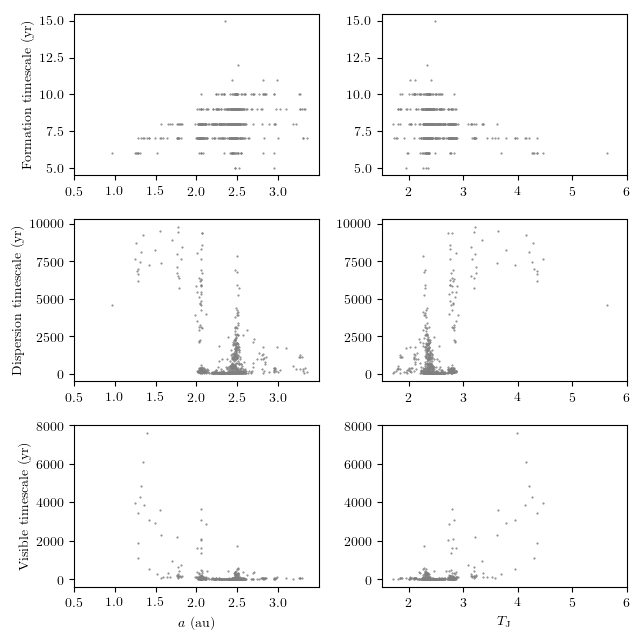

In [28]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

f, ax = plt.subplots(3, 2, figsize=(6.5, 6.5))

ax[0][0].plot(d['a (AU)'], d['formation-grav (yr)'], '.', markersize=1, color='gray')
ax[0][0].set_ylabel('Formation timescale (yr)')
ax[0][0].set_xlim([0.9, 3.5])
ax[0][0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[0][1].plot(tj, d['formation-grav (yr)'], '.', markersize=1, color='gray')
ax[0][1].set_xlim([1.5, 6.0])

ax[1][0].plot(d['a (AU)'], d['dispersion-grav (yr)'], '.', markersize=1, color='gray')
ax[1][0].set_ylabel('Dispersion timescale (yr)')
ax[1][0].set_xlim([0.9, 3.5])
ax[1][0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[1][1].plot(tj, d['dispersion-grav (yr)'], '.', markersize=1, color='gray')
ax[1][1].set_xlim([1.5, 6.0])

ax[2][0].plot(d['a (AU)'], d['visible-grav (yr)'], '.', markersize=1, color='gray')
ax[2][0].set_xlabel('$a$ (au)')
ax[2][0].set_ylabel('Visible timescale (yr)')
ax[2][0].set_xlim([0.9, 3.5])
ax[2][0].set_xticks(np.arange(0.5, 3.5, step=0.5))

ax[2][1].plot(tj, d['visible-grav (yr)'], '.', markersize=1, color='gray')
ax[2][1].set_xlabel(r'$T_\mathrm{J}$')
ax[2][1].set_xlim([1.5, 6.0])

f.tight_layout()
plt.savefig('time-a-tj.pdf')
plt.show()